# Predictive model for classification

### Carregando a Base de Dados tratados no processo de Clusterização

In [1]:
# Importando a biblioteca
import pandas as pd

# Atribuindo à constante "DATA" o caminho e o nome do arquivo csv
DATA = "../data/customers_clustered.csv"

# Carregando o arquivo csv que foi tratado na Clusterização e atribuindo ao DataFrame "df_clustered"
df_clustered = pd.read_csv(DATA)

# Visualizando as 5 primeiras linhas do DataFrame
df_clustered.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [2]:
# Visualizando as informações referentes às colunas do DataFrame
df_clustered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2205 non-null   object 
 1   Marital_Status       2205 non-null   object 
 2   Income               2205 non-null   float64
 3   Kidhome              2205 non-null   int64  
 4   Teenhome             2205 non-null   int64  
 5   Recency              2205 non-null   int64  
 6   MntWines             2205 non-null   int64  
 7   MntFruits            2205 non-null   int64  
 8   MntMeatProducts      2205 non-null   int64  
 9   MntFishProducts      2205 non-null   int64  
 10  MntSweetProducts     2205 non-null   int64  
 11  MntGoldProds         2205 non-null   int64  
 12  NumDealsPurchases    2205 non-null   int64  
 13  NumWebPurchases      2205 non-null   int64  
 14  NumCatalogPurchases  2205 non-null   int64  
 15  NumStorePurchases    2205 non-null   i

### Definindo as variáveis X e y 

In [3]:
# Excluindo a coluna "Response" e atribuindo à variável "X"
X = df_clustered.drop("Response", axis = 1)

# Atribuindo os valores da coluna "Response" à variável target (alvo) "y"
y = df_clustered["Response"]

In [4]:
# Exibindo as 5 primeiras linhas da variável "X"
X.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Age,AgeGroup,MntTotal,MntRegularProds,Children,HasChildren,AcceptedCmpTotal,HasAcceptedCmp,NumTotalPurchases,cluster
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,57,46-60,1617,1529,0,0,0,0,22,0
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,60,46-60,27,21,2,1,0,0,4,1
2,Graduation,Partner,71613.0,0,0,26,426,49,127,111,...,49,46-60,776,734,0,0,0,0,20,0
3,Graduation,Partner,26646.0,1,0,26,11,4,20,10,...,30,18-30,53,48,1,1,0,0,6,1
4,PhD,Partner,58293.0,1,0,94,173,43,118,46,...,33,31-45,422,407,1,1,0,0,14,2


In [5]:
# Exibindo as 5 primeiras linhas da variável "y"
y.head()

0    1
1    0
2    0
3    0
4    0
Name: Response, dtype: int64

### Preparação para a Etapa de Pré Processamento (1° etapa do Pipeline)

- Separando as Colunas de acordo com a análise dos Histogramas efetuada na Etapa de Clusterização
    - Analisando as colunas e definindo qual é a transformação mais adequada para cada coluna;
    - Excluindo a coluna "Response" na lista one_hot_cols;
    - Incluindo a coluna "cluster" na lista one_hot_cols;
    - Substituindo o Dataframe "df" por "X" nas listas power_cols e minmax_cols;

In [6]:
# Atribuindo à variável "one_hot_cols" uma lista das colunas categóricas que serão passadas para o OneHotEncoder
# Obs.: passando as colunas object, as colunas com valores 0 e 1 e as colunas que contém valores inteiros discretos
one_hot_cols = [
    "Education",
    "Marital_Status",
    "AgeGroup",
    "HasChildren",
    "HasAcceptedCmp",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "AcceptedCmp3",
    "AcceptedCmp4",
    "AcceptedCmp5",
    "Complain",
    "Kidhome",
    "Teenhome",
    "YearsSinceEnrolled",
    "Children",
    "AcceptedCmpTotal",
    "cluster",
]

# Atribuindo à variável "standard_cols" as colunas que serão passadas para o Standard Scaler
# Obs.: passando as colunas que se assemelham a uma Distribuição Normal
standard_cols = [
    "Income",
    "Age",
]

# Atribuindo à variável "power_cols" as colunas que serão submetidas a tratamento pelo PowerTransformer do Scikit-learn, considerando o perfil com decrescente quase de forma exponencial, fazendo a transformação de modo que ela se pareça com uma Distribuição Normal
# Obs.: fazendo um filtro das colunas do DataFrame e usando o parâmetro .tolist() para passar de um objeto do tipo índice transformando em uma lista
power_cols = X.columns[
    # Pegando as colunas que iniciam com "Mnt" e "Num"
    X.columns.str.startswith("Mnt") | X.columns.str.startswith("Num")
].tolist()

# Atribuindo à variável "minmax_cols" uma lista das colunas em que faremos o ajuste de escala usando o MinMaxScaler
minmax_cols = [
    # Fazendo um List Comprehension passando por todas as colunas do DataFrame que não estão nas lista anteriores, ou seja, pegando as colunas restantes
    # Obs.: procurando por coluna para cada coluna que está no DataFrame desde que essa coluna não esteja em nenhuma das 3 listas 
    col for col in X.columns if col not in one_hot_cols + standard_cols + power_cols
]

In [7]:
# Visualizando as Listas
display(one_hot_cols)
display(standard_cols)
display(power_cols)
display(minmax_cols)

['Education',
 'Marital_Status',
 'AgeGroup',
 'HasChildren',
 'HasAcceptedCmp',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Complain',
 'Kidhome',
 'Teenhome',
 'YearsSinceEnrolled',
 'Children',
 'AcceptedCmpTotal',
 'cluster']

['Income', 'Age']

['MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'MntTotal',
 'MntRegularProds',
 'NumTotalPurchases']

['Recency', 'DaysSinceEnrolled']

### O Modelo de LogisticRegression antes da Otimização

- Primeiramente iremos reproduzir o Modelo sem quaisquer alterações e gerar as curvas ROC e Precision Recall;
- Posteriormente faremos a comparação do antes e do depois da utilização dos Hiper Parâmetros que iremos aplicar;

In [8]:
# Instalando as bibliotecas
# pip install imblearn pipeline
# pip install imblearn under_sampling

# Importando as bibliotecas para o Pré Processamento
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler,
    PowerTransformer,
)

# Importando as bibliotecas
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline  # atenção para o Pipeline do ImbLearn
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_validate

# Criando a Constante RANDOM_STATE e definindo o valor para que o modelo possa ser repetido
RANDOM_STATE = 42

# Para trabalharmos com Validação Cruzada em um Dataset desbalanceado utilizaremos o StratifiedKFold
# Obs.: passando os parâmetros n_splits, shuffle e random_state, fazendo a estratificação de modo a respeitar o desbalanceamento do Dataset
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = RANDOM_STATE)

# Definindo a 1° etapa (Pré Processamento)
# Obs.: passando as Tuplas que são as Etapas do ColumnTransformer e dentro de cada Tupla os objetos 
preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), one_hot_cols),
        ("standard", StandardScaler(), standard_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("power", PowerTransformer(), power_cols),
    ]
)

# Definindo a 2° etapa (Pipeline) e atribuindo à variável "pipeline_logreg" em alusão ao LogisticRegression
# Obs.1: utilizando o Pipeline do ImbLearn (para trabalhar com dados desbalanceados) e não do sklearn
# Obs.2: passando as Tuplas que são as Etapas do Pipeline e dentro de cada Tupla os objetos 
pipeline_logreg = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("feature_selection", SelectKBest(score_func = f_classif, k = 10)),
        ("rus", RandomUnderSampler(random_state = RANDOM_STATE)),
        ("model", LogisticRegression(random_state = RANDOM_STATE))
    ]
)

# Fazendo o Fit passando como parâmetros o X e o y
pipeline_logreg.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal',
                                                   'cluster']),
                                                 ('standard', Stan...
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest()),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model', LogisticRegression(random_state=42))])

#### Exibindo todas as colunas anteriores ao LogisticRegression

- Mostrando as etapas de Pré Processamento

In [9]:
# Exibindo todas as colunas que entraram no Pipeline
pipeline_logreg[:-1].feature_names_in_

array(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'DaysSinceEnrolled', 'YearsSinceEnrolled', 'Age',
       'AgeGroup', 'MntTotal', 'MntRegularProds', 'Children',
       'HasChildren', 'AcceptedCmpTotal', 'HasAcceptedCmp',
       'NumTotalPurchases', 'cluster'], dtype=object)

In [10]:
# Exibindo as colunas que sairam da Etapa de Pré Processamento
# Obs.: usando como parâmetro o -3 para exibir todas as etapas do Pipeline menos as 3 últimas
pipeline_logreg[:-3].get_feature_names_out()

array(['one-hot__Education_2n Cycle', 'one-hot__Education_Basic',
       'one-hot__Education_Graduation', 'one-hot__Education_Master',
       'one-hot__Education_PhD', 'one-hot__Marital_Status_Partner',
       'one-hot__Marital_Status_Single', 'one-hot__AgeGroup_18-30',
       'one-hot__AgeGroup_31-45', 'one-hot__AgeGroup_46-60',
       'one-hot__AgeGroup_61+', 'one-hot__HasChildren_0',
       'one-hot__HasChildren_1', 'one-hot__HasAcceptedCmp_0',
       'one-hot__HasAcceptedCmp_1', 'one-hot__AcceptedCmp1_0',
       'one-hot__AcceptedCmp1_1', 'one-hot__AcceptedCmp2_0',
       'one-hot__AcceptedCmp2_1', 'one-hot__AcceptedCmp3_0',
       'one-hot__AcceptedCmp3_1', 'one-hot__AcceptedCmp4_0',
       'one-hot__AcceptedCmp4_1', 'one-hot__AcceptedCmp5_0',
       'one-hot__AcceptedCmp5_1', 'one-hot__Complain_0',
       'one-hot__Complain_1', 'one-hot__Kidhome_0', 'one-hot__Kidhome_1',
       'one-hot__Kidhome_2', 'one-hot__Teenhome_0', 'one-hot__Teenhome_1',
       'one-hot__Teenhome_2', 'one-

In [11]:
# Somando a quantidade de colunas que sairam da Etapa de Pré Processamento, totalizando 65
# Obs.: usando como parâmetro o -3 para exibir todas as etapas do Pipeline menos as 3 últimas
len(pipeline_logreg[:-3].get_feature_names_out())

65

In [12]:
# Exibindo as colunas, reduzidas de 65 para 10, que chegaram à etapa RandomUnderSampler
# Obs.1: poder ser que somente com 10 colunas o Modelo tenha ficado muito limitado;
# Obs.2: todas elas relacionadas à aceitação de campanhas de marketing anteriores e ao total de campanhas
# Obs.3: usando como parâmetro o -1 para exibir todas as etapas do Pipeline menos a última
pipeline_logreg[:-1].get_feature_names_out()

array(['one-hot__HasAcceptedCmp_0', 'one-hot__HasAcceptedCmp_1',
       'one-hot__AcceptedCmp1_0', 'one-hot__AcceptedCmp1_1',
       'one-hot__AcceptedCmp3_0', 'one-hot__AcceptedCmp3_1',
       'one-hot__AcceptedCmp5_0', 'one-hot__AcceptedCmp5_1',
       'one-hot__AcceptedCmpTotal_0', 'one-hot__AcceptedCmpTotal_3'],
      dtype=object)

#### Visualizando a Curva ROC antes da otimização

- Curva ROC:
    - Receiver Operating Characteristic (Característica de Operação do Receptor)
        - "é uma representação gráfica que ilustra o desempenho (ou performance) de um sistema classificador binário"
        - "A curva ROC foi inicialmente desenvolvida por engenheiros eletricista e engenheiros de radar durante a Segunda Gerra Mundial para detectar objetos inimigos em campos de batalha e não tardou para ser introduzida em psicologia para explicar a detecção perceptiva de estímulos"
    - Vai medir a relação entre a sensibilidade e a especificidade.

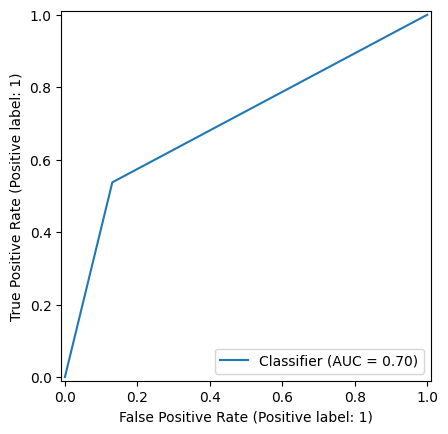

In [13]:
# Importando as bibliotecas
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict

# Fazendo a cross_val_predict e atribuindo à variável "y_pred"
# Obs.1: o cross_val_predict diferente do cross_validate e do cross_val_score não se aplica para a comparação de performances de modelos de classificação
# Obs.2: passando os parâmetros para gerar os valores que irão dar origem à Curva ROC
y_pred = cross_val_predict(pipeline_logreg, 
                           X, 
                           y, 
                           # passando quem vai fazer a divisão em folds
                           cv = skf, 
                           # usando toda a capacidade de processamento da máquina
                           n_jobs = -1)

# Gerando a Curva Roc e atribuindo à variável "roc"
roc = RocCurveDisplay.from_predictions(y, y_pred)

#### Visualizando a Curva Precision Recall antes da otimização

Vide documentação: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html

Parameters:
sklearn.model_selection.cross_val_predict(estimator, X, y=None, *, groups=None, cv=None, n_jobs=None, verbose=0, fit_params=None, params=None, pre_dispatch='2*n_jobs', method='predict')

Generate cross-validated estimates for each input data point.

The data is split according to the cv parameter. Each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on the corresponding training set.

Passing these predictions into an evaluation metric may not be a valid way to measure generalization performance. Results can differ from cross_validate and cross_val_score unless all tests sets have equal size and the metric decomposes over samples.

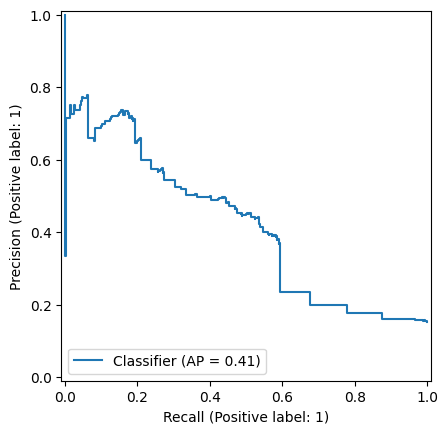

In [14]:
# Importando a biblioteca
from sklearn.metrics import PrecisionRecallDisplay

# Fazendo a cross_val_predict e atribuindo à variável "y_pred"
# Obs.1: o cross_val_predict diferente do cross_validate e do cross_val_score não se aplica para a comparação de performances de modelos de classificação
# Obs.2: passando os parâmetros para gerar os valores que irão dar origem à Curva Precision Recall
y_pred = cross_val_predict(pipeline_logreg,
                           X,
                           y,
                           # passando quem vai fazer a divisão em folds   
                           cv = skf,
                           # usando toda a capacidade de processamento da máquina
                           n_jobs = -1,
                           # passando para o parâmetro method = "decision_function", conforme documentação
                           method = "decision_function")

# Gerando a Curva Precision Recall e atribuindo à variável "prc"
prc = PrecisionRecallDisplay.from_predictions(y, y_pred)

### Otimização dos Hiper Parâmetros do Modelo de LogisticRegression

In [15]:
# Exibindo todas as etapas do Pipeline
# Obs.: podemos ajustar os parâmetros de cada uma destas etapas
pipeline_logreg.named_steps

{'preprocessing': ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                  ['Education', 'Marital_Status', 'AgeGroup',
                                   'HasChildren', 'HasAcceptedCmp',
                                   'AcceptedCmp1', 'AcceptedCmp2',
                                   'AcceptedCmp3', 'AcceptedCmp4',
                                   'AcceptedCmp5', 'Complain', 'Kidhome',
                                   'Teenhome', 'YearsSinceEnrolled', 'Children',
                                   'AcceptedCmpTotal', 'cluster']),
                                 ('standard', StandardScaler(),
                                  ['Income', 'Age']),
                                 ('minmax', MinMaxScaler(),
                                  ['Recency', 'DaysSinceEnrolled']),
                                 ('power', PowerTransformer(),
                                  ['MntWines', 'MntFruits', 'MntMeatProducts',
                             

#### Aplicando a Validação Cruzada, GridSearchCV

In [16]:
# Importando a biblioteca
import numpy as np

# Passando valores de potências de 10, por exemplo 7 valores de -3 até 3 
np.logspace(-3, 3, 7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [17]:
# Importando a biblioteca
from sklearn.model_selection import GridSearchCV

# Passando diferentes parâmetros para cada etapa e atribuindo ao dicionário "param_grid"
# Obs.1: esse dicionário receberá os parâmetros que serão testados em cada etapa desejada
# Obs.2: vide parâmetros na documentação https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Obs.3: a quantidade de parâmetros tem influência no tempo de processamento, portanto 
param_grid = {
    # Para não ficarmos limitadas em apenas 10 colunas, alteraremos os valores de k do SelectKBest (vide Pipeline)
    # Obs.: passando os valores 10, 15, 20, 25 para a etapa feature_selection para serem testados na variável k
    "feature_selection__k": [10, 15, 20, 25],
    # Utilizando valores de potências de 10, por exemplo 7 valores de -3 até 3
    # Obs.: passando os valores np.logspace(-3, 3, 7) a serem testados para a etapa model (vide Pipeline)
    "model__C": np.logspace(-3, 3, 7),
    # Passando uma lista com os valores "liblinear", "lbfgs", "saga" a serem testados para a etapa model (vide Pipeline)
    # Obs.: nem todos os parâmetros solver combinam com todos os parâmetros penalty
    "model__solver": ["liblinear", "lbfgs", "saga"],
    # Passando uma lista com os valores "l1", "l2", "elasticnet", "none" a serem testados para a etapa model (vide Pipeline)
    "model__penalty": ["l1", "l2", "elasticnet", "none"],
}

# Fazendo a Validação Cruzada, GridSearchCV e passando os parâmetros
# Obs.: ver documentação https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(
    pipeline_logreg,
    param_grid,
    # Passando as métricas a serem testadas
    scoring = ["roc_auc", "average_precision", "accuracy"],
    # Usando toda a capacidade de processamento da máquina
    n_jobs = -1,
    # Escolhendo qual será a principal métrica
    # Obs.: a escolha pela average_precision é a mais adequada por se tratar de uma base desbalanceada
    refit = "average_precision"
)

#### Visualizando a Validação Cruzada, GridSearchCV

In [18]:
# Exibindo o GridSearchCV
# Obs.: basicamente ele é o Pipeline fazendo todas a combinações possíveis para verificarmos quais são os melhores parâmetros considerando essas métricas
grid_search

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('one-hot',
                                                                         OneHotEncoder(),
                                                                         ['Education',
                                                                          'Marital_Status',
                                                                          'AgeGroup',
                                                                          'HasChildren',
                                                                          'HasAcceptedCmp',
                                                                          'AcceptedCmp1',
                                                                          'AcceptedCmp2',
                                                                          'AcceptedCmp3',
                                                                          'AcceptedCmp4',
                                                                          'AcceptedCmp5',
                                                                          'Complain',
                                                                          'Kidhome',
                                                                          'Teenhome',
                                                                          'YearsSinceEnrolled',
                                                                          'Children',
                                                                          'AcceptedCmpTotal',
                                                                          'clus...
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [10, 15, 20, 25],
                         'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['liblinear', 'lbfgs', 'saga']},
             refit='average_precision',
             scoring=['roc_auc', 'average_precision', 'accuracy'])

In [19]:
# Importando a biblioteca
# Obs.: estamos ignorando devido ao fato de algumas combinações não serem compatíveis, pois como podemos observar na documentação, nem todos os parâmetros solver combinam com todos os parâmetros penalty
import warnings

# Ocultando os warnings
warnings.filterwarnings("ignore")

#### Fazendo o Fit para os valores de X e de y e visualizando o GridSearchCV

In [20]:
# Fazendo o Fit passando como parâmetros os valores de X e de y
grid_search.fit(X, y)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('one-hot',
                                                                         OneHotEncoder(),
                                                                         ['Education',
                                                                          'Marital_Status',
                                                                          'AgeGroup',
                                                                          'HasChildren',
                                                                          'HasAcceptedCmp',
                                                                          'AcceptedCmp1',
                                                                          'AcceptedCmp2',
                                                                          'AcceptedCmp3',
                                                                          'AcceptedCmp4',
                                                                          'AcceptedCmp5',
                                                                          'Complain',
                                                                          'Kidhome',
                                                                          'Teenhome',
                                                                          'YearsSinceEnrolled',
                                                                          'Children',
                                                                          'AcceptedCmpTotal',
                                                                          'clus...
                                        RandomUnderSampler(random_state=42)),
                                       ('model',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'feature_selection__k': [10, 15, 20, 25],
                         'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'model__penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'model__solver': ['liblinear', 'lbfgs', 'saga']},
             refit='average_precision',
             scoring=['roc_auc', 'average_precision', 'accuracy'])

#### Explorando os resultados do dicionário `grid_search`

In [21]:
# Visualizando os parâmetros que maximizam a métrica average_precision e consequentemente o score
# Obs.: isso mostra que se quisermos que o modelo performe melhor temos que treiná-lo com esses parâmetros
grid_search.best_params_

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l2',
 'model__solver': 'liblinear'}

In [22]:
# Visualizando o melhor score para a área da curva Precision Recall 
grid_search.best_score_

0.5857418098239213

In [23]:
# Exibindo as chaves para explorarmos os resultados que estão armazenados no dicionário 
# Obs.1: usando o * para fazer o unpacking do dicionário
# Obs.2: usando o parâmetro sep = "\n" para separação e pular linha
print(*grid_search.cv_results_.keys(), sep = "\n")

mean_fit_time
std_fit_time
mean_score_time
std_score_time
param_feature_selection__k
param_model__C
param_model__penalty
param_model__solver
params
split0_test_roc_auc
split1_test_roc_auc
split2_test_roc_auc
split3_test_roc_auc
split4_test_roc_auc
mean_test_roc_auc
std_test_roc_auc
rank_test_roc_auc
split0_test_average_precision
split1_test_average_precision
split2_test_average_precision
split3_test_average_precision
split4_test_average_precision
mean_test_average_precision
std_test_average_precision
rank_test_average_precision
split0_test_accuracy
split1_test_accuracy
split2_test_accuracy
split3_test_accuracy
split4_test_accuracy
mean_test_accuracy
std_test_accuracy
rank_test_accuracy


#### Visualizando os resultados das demais métricas

In [24]:
# Visualizando o resultado para a chave mean_test_average_precision 
# Obs.1: é exatamente o mesmo resultado para o melhor score (métrica) para a área da curva Precision Recall que foi passada para o refit
# Obs.2: nanmax ou nanmin são funções do numpy que retornam o valor máximo ou mínimo desconsiderando os valores nan
# Obs.3: o resultado é a média dos 5 splits uma vez que na Validação Cruzada, GridSearchCV por padrão o cv = None
np.nanmax(grid_search.cv_results_["mean_test_average_precision"])

0.5857418098239213

In [25]:
# Visualizando o resultado para a chave mean_test_roc_auc 
# Obs.1: nanmax ou nanmin são funções do numpy que retornam o valor máximo ou mínimo desconsiderando os valores nan
# Obs.2: o resultado é a média dos 5 splits uma vez que na Validação Cruzada, GridSearchCV por padrão o cv = None
np.nanmax(grid_search.cv_results_["mean_test_roc_auc"])

0.8656658454607532

In [26]:
# Visualizando o resultado para a chave mean_test_accuracy 
# Obs.1: nanmax ou nanmin são funções do numpy que retornam o valor máximo ou mínimo desconsiderando os valores nan
# Obs.2: o resultado é a média dos 5 splits uma vez que na Validação Cruzada, GridSearchCV por padrão o cv = None
np.nanmax(grid_search.cv_results_["mean_test_accuracy"])

0.8489795918367348

#### Visualizando os parâmetros que geraram os valores de cada uma das 3 Métricas

- Usando a chave params do dicionário grid_search que é uma Lista de Dicionários

In [27]:
# Exibindo os parâmetros que geraram o valor para a métrica mean_test_average_precision
# Obs.: usando a função nanargmax do numpy para pegar o índice máximo da chave mean_test_average_precision dentro da chave params, que para esta métrica equivale a grid_search.best_params_
grid_search.cv_results_["params"][np.nanargmax(grid_search.cv_results_["mean_test_average_precision"])]

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l2',
 'model__solver': 'liblinear'}

In [28]:
# Exibindo os parâmetros que geraram o valor para a métrica mean_test_roc_auc
# Obs.: usando a função nanargmax do numpy para pegar o índice máximo da chave mean_test_roc_auc dentro da chave params
grid_search.cv_results_["params"][np.nanargmax(grid_search.cv_results_["mean_test_roc_auc"])]

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [29]:
# Exibindo os parâmetros que geraram o valor para a métrica mean_test_accuracy
# Obs.: usando a função nanargmax do numpy para pegar o índice máximo da chave mean_test_accuracy dentro da chave params
grid_search.cv_results_["params"][np.nanargmax(grid_search.cv_results_["mean_test_accuracy"])]

{'feature_selection__k': 10,
 'model__C': 0.001,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

#### Colocando os resultados das 3 Métricas do objeto grid_search em um DataFrame

In [30]:
# Criando um Novo DataFrame a partir de um dicionário e atribuindo a ele as médias de cada das métricas
df_results_gs = pd.DataFrame(
    {
        "auprc": grid_search.cv_results_["mean_test_average_precision"],
        "auroc": grid_search.cv_results_["mean_test_roc_auc"],
        "accuracy": grid_search.cv_results_["mean_test_accuracy"],
    }
)

# Exibindo o DataFrame
df_results_gs

,auprc,auroc,accuracy
0,0.151020,0.500000,0.848980
1,NaN,NaN,NaN
2,0.151020,0.500000,0.848980
3,0.403915,0.722988,0.810884
4,0.403915,0.722988,0.810884
...,...,...,...
331,NaN,NaN,NaN
332,NaN,NaN,NaN
333,NaN,NaN,NaN
334,NaN,NaN,NaN


#### Visualizando as 3 Métricas do objeto grid_search em um BoxPlot

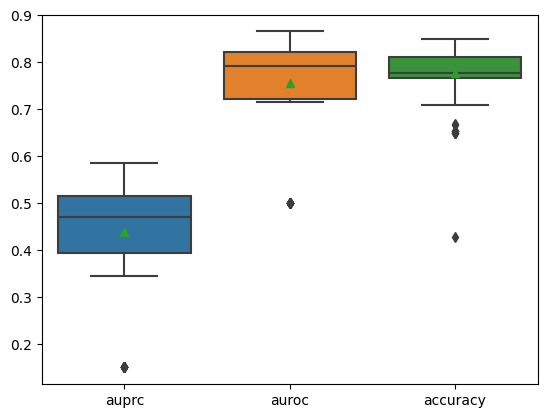

In [31]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns

# Gerando o boxplot para o DataFrame e exibindo as médias
sns.boxplot(
    data = df_results_gs,
    showmeans = True
);

- ``Analizando o Boxplot:``
    - Observa-se a faixa de valores para cada métrica e alguns outliers

In [32]:
# Visualizando novamente os parâmetros que maximizam a métrica average_precision e consequentemente o score
# Obs.: isso mostra que se quisermos que o modelo performe melhor temos que treiná-lo com esses parâmetros
grid_search.best_params_

{'feature_selection__k': 25,
 'model__C': 10.0,
 'model__penalty': 'l2',
 'model__solver': 'liblinear'}

#### Retreinando o Modelo criando um Pipeline com os Hiper Parâmetros utilizados

In [33]:
# Redefinindo a etapa (Pipeline) e atribuindo à variável "pipeline_logreg_best", ou seja, utilizando os melhores parâmetros para a otimização do modelo de classificação da LogisticRegression
# Obs.1: o parâmetro k recebe o valor de grid_search.best_params_["feature_selection__k"])
# Obs.2: o parâmetro c recebe o valor de grid_search.best_params_["model__C"]
# Obs.3: o parâmetro penalty recebe o valor de grid_search.best_params_["model__penalty"]
# Obs.4: o parâmetro solver recebe o valor de grid_search.best_params_["model__solver"]
pipeline_logreg_best = Pipeline(
    [
        ("preprocessing", preprocessing),
        ("feature_selection", SelectKBest(score_func = f_classif, k = grid_search.best_params_["feature_selection__k"])),
        ("rus", RandomUnderSampler(random_state = RANDOM_STATE)),
        ("model", LogisticRegression(
            random_state = RANDOM_STATE,
            C = grid_search.best_params_["model__C"],
            penalty = grid_search.best_params_["model__penalty"],
            solver = grid_search.best_params_["model__solver"],
        ))
    ]
)

# Fazendo a cross_validate e atribuindo à variável "scores"
# Obs.: usando o Pipeline redefinido pipeline_logreg_best e os valores de X e de y
scores = cross_validate(
    pipeline_logreg_best,
    X,
    y,
    # Passando quem vai fazer a divisão em folds
    cv = skf,
    # Passando as métricas a serem testadas
    scoring = ["accuracy", "precision", "recall", "roc_auc", "average_precision"],
    # usando toda a capacidade de processamento da máquina# usando toda a capacidade de processamento da máquina
    n_jobs = -1
)

In [34]:
# Exibindo as etapas do Pipeline após a otimização
pipeline_logreg_best

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal',
                                                   'cluster']),
                                                 ('standard', Stan...
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest(k=25)),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=10.0, random_state=42,
                                    solver='liblinear'))])

In [35]:
# Visualizando os resultados da otimização para cada uma das métricas
scores

{'fit_time': array([0.20509863, 0.23180652, 0.23886108, 0.22336054, 0.25989866]),
 'score_time': array([0.07865453, 0.08846331, 0.08593202, 0.07584834, 0.08285856]),
 'test_accuracy': array([0.75963719, 0.7755102 , 0.78231293, 0.80498866, 0.75056689]),
 'test_precision': array([0.35338346, 0.37096774, 0.384     , 0.41935484, 0.35526316]),
 'test_recall': array([0.70149254, 0.68656716, 0.71641791, 0.78787879, 0.81818182]),
 'test_roc_auc': array([0.83165057, 0.83167052, 0.84019076, 0.89513131, 0.85387879]),
 'test_average_precision': array([0.57120364, 0.56859571, 0.52419412, 0.67153395, 0.56648324])}

In [36]:
# Somando as valores de "fit_time" e "score_time" e atribuindo à Nova Chave "time"
scores["time"] = scores["fit_time"] + scores["score_time"]

# Visualizando os resultados para cada uma das métricas com a coluna "time" incluída
scores

{'fit_time': array([0.20509863, 0.23180652, 0.23886108, 0.22336054, 0.25989866]),
 'score_time': array([0.07865453, 0.08846331, 0.08593202, 0.07584834, 0.08285856]),
 'test_accuracy': array([0.75963719, 0.7755102 , 0.78231293, 0.80498866, 0.75056689]),
 'test_precision': array([0.35338346, 0.37096774, 0.384     , 0.41935484, 0.35526316]),
 'test_recall': array([0.70149254, 0.68656716, 0.71641791, 0.78787879, 0.81818182]),
 'test_roc_auc': array([0.83165057, 0.83167052, 0.84019076, 0.89513131, 0.85387879]),
 'test_average_precision': array([0.57120364, 0.56859571, 0.52419412, 0.67153395, 0.56648324]),
 'time': array([0.28375316, 0.32026982, 0.3247931 , 0.29920888, 0.34275723])}

In [37]:
# Criando um DataFrame com os resultados da otimização e atribuindo ao Novo DataFrame "df_scores_best"
df_scores_best = pd.DataFrame(scores)

# Exibindo o DataFrame
df_scores_best

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_roc_auc,test_average_precision,time
0,0.205099,0.078655,0.759637,0.353383,0.701493,0.831651,0.571204,0.283753
1,0.231807,0.088463,0.775510,0.370968,0.686567,0.831671,0.568596,0.320270
2,0.238861,0.085932,0.782313,0.384000,0.716418,0.840191,0.524194,0.324793
3,0.223361,0.075848,0.804989,0.419355,0.787879,0.895131,0.671534,0.299209
4,0.259899,0.082859,0.750567,0.355263,0.818182,0.853879,0.566483,0.342757


#### Visualização do Modelo de Classificação da Regressão Logística otimizado

- Obs.: na forma de Gráficos BoxPlot

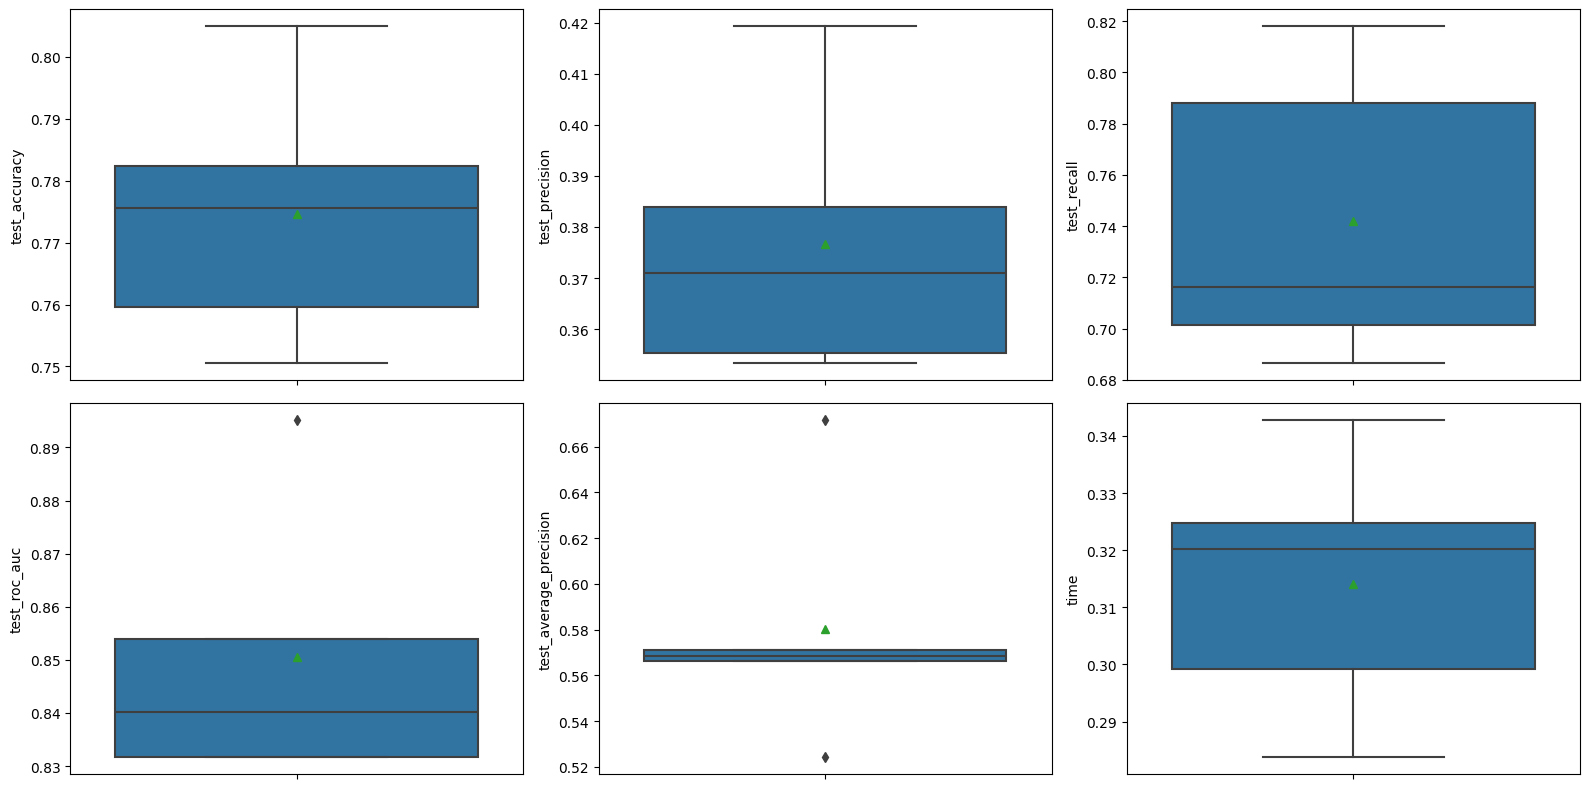

In [38]:
# Criando uma figura com um sistema de eixos de 2 linhas e 3 colunas
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 8), tight_layout = True)

# Criando uma lista a partir da coluna de índice 2 do DataFrame, referentes às Métricas que queremos analisar ee atribuindo à variável "cols"
cols = df_scores_best.columns[2:].to_list()

# Percorrendo cada eixo do sistema de eixos axs e por cada coluna em cols
# Obs.: usando o parâmetro .flatten() para colocar de forma unidimensional
for ax, col in zip(axs.flatten(), cols):
    # Criando gráficos BoxPlot passando os parâmetros e atribuindo à variável "b" de boxplot
    b = sns.boxplot(y = col,
                    data = df_scores_best,
                    ax = ax,
                    showmeans = True)

# Exibindo o gráfico
plt.show()

- ``Analisando os BoxPlot's:``
    - Observamos que a accuracy está variando entre 0.75 e 0.81;
    - Os valores de precision são bem baixos oscilando entre 0.35 e 0.42;
    - O Recall vai de 0.69 a 0.82;
    - O roc_auc entre 0.83 e 0.86 mostrando a existência de um outlier;
    - No average_precision temos outliers abaixo e acima e com a mediana em aproximadamente 0.57;
    - E o time, soma do fit_time e score_time, é bem baixo;

In [39]:
# Visualizando quais são as features mais importantes durante o treinamento do Modelo fazendo o Fit e passando como parâmetros os valores de X e de y
pipeline_logreg_best.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('one-hot', OneHotEncoder(),
                                                  ['Education',
                                                   'Marital_Status', 'AgeGroup',
                                                   'HasChildren',
                                                   'HasAcceptedCmp',
                                                   'AcceptedCmp1',
                                                   'AcceptedCmp2',
                                                   'AcceptedCmp3',
                                                   'AcceptedCmp4',
                                                   'AcceptedCmp5', 'Complain',
                                                   'Kidhome', 'Teenhome',
                                                   'YearsSinceEnrolled',
                                                   'Children',
                                                   'AcceptedCmpTotal',
                                                   'cluster']),
                                                 ('standard', Stan...
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'NumWebVisitsMonth',
                                                   'MntTotal',
                                                   'MntRegularProds',
                                                   'NumTotalPurchases'])])),
                ('feature_selection', SelectKBest(k=25)),
                ('rus', RandomUnderSampler(random_state=42)),
                ('model',
                 LogisticRegression(C=10.0, random_state=42,
                                    solver='liblinear'))])

In [40]:
# Exibindo os nomes das 25 features que chegaram à etapa RandomUnderSampler e atribuindo à variável "names"
# Obs.: usando como parâmetro o -1 para exibir todas as etapas do Pipeline menos a última
names = pipeline_logreg_best[:-1].get_feature_names_out()

# Exibindo o objeto array
names

array(['one-hot__HasChildren_0', 'one-hot__HasChildren_1',
       'one-hot__HasAcceptedCmp_0', 'one-hot__HasAcceptedCmp_1',
       'one-hot__AcceptedCmp1_0', 'one-hot__AcceptedCmp1_1',
       'one-hot__AcceptedCmp3_0', 'one-hot__AcceptedCmp3_1',
       'one-hot__AcceptedCmp4_0', 'one-hot__AcceptedCmp4_1',
       'one-hot__AcceptedCmp5_0', 'one-hot__AcceptedCmp5_1',
       'one-hot__Children_0', 'one-hot__AcceptedCmpTotal_0',
       'one-hot__AcceptedCmpTotal_1', 'one-hot__AcceptedCmpTotal_2',
       'one-hot__AcceptedCmpTotal_3', 'one-hot__cluster_0',
       'minmax__Recency', 'minmax__DaysSinceEnrolled', 'power__MntWines',
       'power__MntMeatProducts', 'power__NumCatalogPurchases',
       'power__MntTotal', 'power__MntRegularProds'], dtype=object)

In [41]:
# Somando a quantidade de colunas que sairam da Etapa SelectKBest, totalizando 25
len(names)

25

#### Verificando a importância de cada uma das features

- Do ponto de vista do Modelo 

In [42]:
# Pegando os coeficientes que o modelo calculou e atribuindo à variável "importance"
importance = pipeline_logreg_best["model"].coef_[0]

# Exibindo os coeficientes
importance

array([ 0.38372803,  0.03810185, -0.80733667,  1.22916655, -0.1601319 ,
        0.58196178, -0.46594065,  0.88777053,  0.17604569,  0.2457842 ,
       -0.14481382,  0.56664371,  0.38372803, -0.80733667, -1.86580335,
       -0.98261247, -0.52200396, -0.75675511, -3.02266538,  3.76148746,
       -0.44092878,  1.33110152,  0.35340231,  0.6387897 , -1.4777058 ])

In [43]:
# Colocando esses coeficientes na forma de um DataFrame e atribuindo à variável "df_importance"
# Obs.: passando as variáveis na forma de um dicionário
df_importance = pd.DataFrame(
    {
        "name": names,
        "importance": importance
    }
)

# Classificando pela coluna "importance" na ordem ascendente e exibindo o DataFrame
df_importance.sort_values(by = "importance")

,name,importance
18,minmax__Recency,-3.022665
14,one-hot__AcceptedCmpTotal_1,-1.865803
24,power__MntRegularProds,-1.477706
15,one-hot__AcceptedCmpTotal_2,-0.982612
2,one-hot__HasAcceptedCmp_0,-0.807337
13,one-hot__AcceptedCmpTotal_0,-0.807337
17,one-hot__cluster_0,-0.756755
16,one-hot__AcceptedCmpTotal_3,-0.522004
6,one-hot__AcceptedCmp3_0,-0.465941
20,power__MntWines,-0.440929


#### Nos dois extremos, importância com mais peso para menos:

- Os coeficientes estão dentro de uma mesma ordem de grandeza

In [44]:
# 	                        name	importance
# 18	minmax__Recency	            -3.022665
# 14	one-hot__AcceptedCmpTotal_1	-1.865803
# 24	power__MntRegularProds	    -1.477706
# 15	one-hot__AcceptedCmpTotal_2	-0.982612

#### Nos dois extremos, importância com mais peso para mais:

- Os coeficientes estão dentro de uma mesma ordem de grandeza

In [45]:
#                           name	importance
# 7	    one-hot__AcceptedCmp3_1	    0.887771
# 3	    one-hot__HasAcceptedCmp_1	1.229167
# 21	power__MntMeatProducts	    1.331102
# 19	minmax__DaysSinceEnrolled	3.761487

#### Visualizando a Curva ROC após a otimização dos Hiper Parâmetros 

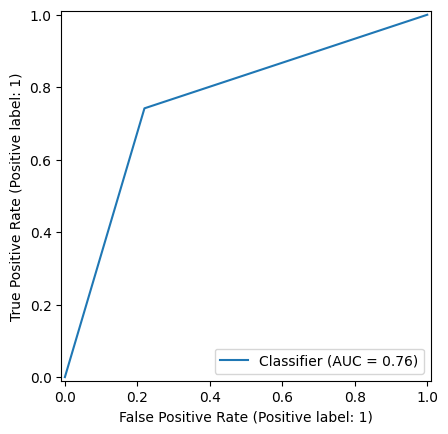

In [46]:
# Importando as bibliotecas
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_predict

# Fazendo a cross_val_predict e atribuindo à variável "y_pred"
# Obs.1: o cross_val_predict diferente do cross_validate e do cross_val_score não se aplica para a comparação de performances de modelos de classificação
# Obs.2: passando os parâmetros para gerar os valores que irão dar origem à Curva ROC
y_pred = cross_val_predict(pipeline_logreg_best,
                           X,
                           y,
                           cv = skf,
                           n_jobs = -1)

# Gerando a Curva Roc e atribuindo à variável "roc"
roc = RocCurveDisplay.from_predictions(y, y_pred)

#### ``Comparando com a Curva ROC antes da otimização``

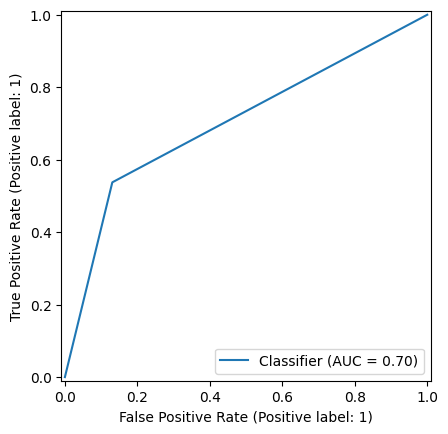

- Observamos que houve a melhoria no Classifier AUC de 0.70 para 0.76

#### Visualizando a Curva Precision Recall após a otimização dos Hiper Parâmetros 

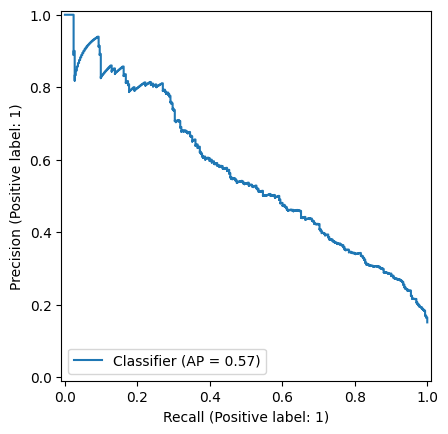

In [47]:
# Importando a biblioteca
from sklearn.metrics import PrecisionRecallDisplay

# Fazendo a cross_val_predict e atribuindo à variável "y_pred"
# Obs.1: o cross_val_predict diferente do cross_validate e do cross_val_score não se aplica para a comparação de performances de modelos de classificação
# Obs.2: passando os parâmetros para gerar os valores que irão dar origem à Curva Precision Recall
y_pred = cross_val_predict(pipeline_logreg_best, 
                           X, 
                           y,
                           cv = skf,
                           n_jobs = -1,
                           method = "decision_function")

# Gerando a Curva Precision Recall e atribuindo à variável "prc"# Gerando a Curva Precision Recall e atribuindo à variável "prc"
prc = PrecisionRecallDisplay.from_predictions(y, y_pred)

#### ``Comparando com a Curva Precision Recall antes da otimização``

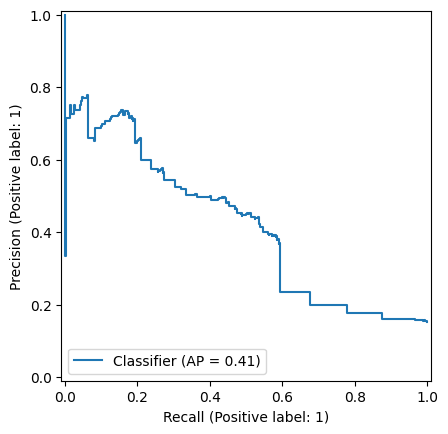

- Observamos que houve a melhoria no Classifier AP de 0.41 para 0.57